## Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from neural_networks import NeuralNetwork as NN


### Importing dataset

In [2]:
raw_df = pd.read_csv('./Dataset/Dengue.csv')
raw_df.head()

,serial,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
0,0,34.053151,24.478082,28.709863,39.757808,25.317808,32.306301,22.971233,73.508219,2.921726,...,1007.911781,50.747945,3.789863,208.097808,17.973699,7.232877,2.558904,1.197260,4925.0,normal
1,1,34.086179,25.694309,29.464228,41.338211,28.140650,34.423577,23.484553,72.066667,3.783415,...,1003.533333,48.313821,2.884553,222.926016,19.246341,7.504065,1.658537,0.991870,5077.0,normal
2,2,34.573984,25.417886,29.526829,40.464228,26.560163,33.085366,22.580488,69.424390,3.065854,...,1005.731707,55.621138,4.242276,229.413008,19.802439,7.829268,1.910569,1.170732,7579.0,normal
3,3,33.020325,25.080488,28.727642,37.878049,26.193496,31.772358,21.752033,69.297561,6.025203,...,1003.359350,50.208130,2.991057,225.421951,19.480488,7.593496,1.300813,0.146341,13706.0,normal
4,4,30.660976,24.230894,26.774797,36.586992,24.263415,28.943902,24.214634,86.652033,23.336585,...,1009.995935,45.542276,3.886992,176.598374,15.261789,6.186992,0.967480,3.951220,82.0,normal


### performing initial checks on dataset

In [3]:
pd.options.display.max_columns=None

In [4]:
raw_df.describe(include='all')

,serial,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.0,602.0,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,602
mean,300.500000,31.918079,24.588318,27.813181,38.476069,25.613154,31.485111,23.984349,81.254786,13.120862,69.625588,9.034032,0.0,0.0,17.599554,191.498693,1004.690531,59.701192,3.632620,199.802695,17.251785,6.877674,1.827725,0.859734,8502.342193,NaN
std,173.926709,2.737215,2.727919,2.412416,4.776400,4.178797,4.672951,2.668014,9.406354,28.463365,45.539264,14.201016,0.0,0.0,8.980189,81.604668,41.364967,20.832639,1.890352,54.128192,4.676051,1.763928,1.237389,0.973575,6780.749627,NaN
min,0.000000,25.000000,12.740000,18.820000,25.000000,12.360000,18.626667,4.480000,40.833333,0.000000,0.000000,0.000000,0.0,0.0,3.600000,0.500000,0.000000,0.000000,0.800000,57.900000,5.000000,2.000000,0.000000,0.000000,52.000000,NaN
25%,150.250000,30.025000,23.200000,26.500000,35.600000,23.200000,28.100000,23.300000,75.800000,0.000000,0.000000,0.000000,0.0,0.0,11.200000,134.425000,1002.025000,47.400000,2.523780,160.350000,13.900000,6.000000,1.000000,0.000000,3017.750000,NaN
50%,300.500000,31.700000,25.000000,27.900000,38.400000,25.000000,31.500000,24.529268,82.800000,3.000000,100.000000,4.170000,0.0,0.0,15.589178,207.300000,1007.000000,63.700000,3.200000,205.750000,17.750000,7.000000,2.000000,1.000000,7490.000000,NaN
75%,450.750000,33.600000,26.500000,29.448171,41.900000,26.600000,34.875000,25.475000,88.175000,12.589000,100.000000,9.705508,0.0,0.0,22.775000,252.375000,1010.185772,73.200000,4.300000,238.800610,20.600610,8.000000,3.000000,1.000000,12702.500000,NaN


In [5]:
raw_df['cases'].describe()

count      602.000000
mean      8502.342193
std       6780.749627
min         52.000000
25%       3017.750000
50%       7490.000000
75%      12702.500000
max      24983.000000
Name: cases, dtype: float64

In [6]:
#Updating labels column: might be useful in future to test classification problem
raw_df['labels'] = pd.cut(
    raw_df['cases'],
    bins=[-float('inf'), 2500, 5000, 7500, float('inf')],
    labels=[0, 1, 2, 3]
).astype(int)


In [7]:
raw_df.head()

,serial,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
0,0,34.053151,24.478082,28.709863,39.757808,25.317808,32.306301,22.971233,73.508219,2.921726,44.657534,4.360932,0.0,0.0,15.678356,175.595342,1007.911781,50.747945,3.789863,208.097808,17.973699,7.232877,2.558904,1.197260,4925.0,1
1,1,34.086179,25.694309,29.464228,41.338211,28.140650,34.423577,23.484553,72.066667,3.783415,39.837398,2.676748,0.0,0.0,14.574797,158.349593,1003.533333,48.313821,2.884553,222.926016,19.246341,7.504065,1.658537,0.991870,5077.0,2
2,2,34.573984,25.417886,29.526829,40.464228,26.560163,33.085366,22.580488,69.424390,3.065854,33.333333,2.337805,0.0,0.0,14.978049,202.621138,1005.731707,55.621138,4.242276,229.413008,19.802439,7.829268,1.910569,1.170732,7579.0,3
3,3,33.020325,25.080488,28.727642,37.878049,26.193496,31.772358,21.752033,69.297561,6.025203,37.398374,2.676667,0.0,0.0,16.504878,183.544715,1003.359350,50.208130,2.991057,225.421951,19.480488,7.593496,1.300813,0.146341,13706.0,3
4,4,30.660976,24.230894,26.774797,36.586992,24.263415,28.943902,24.214634,86.652033,23.336585,96.747967,15.616992,0.0,0.0,19.546341,224.030081,1009.995935,45.542276,3.886992,176.598374,15.261789,6.186992,0.967480,3.951220,82.0,0


### Preparing the input data to neural network

In [8]:
df = raw_df.copy()

In [9]:
df.drop(columns=['serial', 'cases', 'labels', 'stations', 'snow', 'snowdepth'], inplace=True)

In [10]:
df.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions
0,34.053151,24.478082,28.709863,39.757808,25.317808,32.306301,22.971233,73.508219,2.921726,44.657534,4.360932,15.678356,175.595342,1007.911781,50.747945,3.789863,208.097808,17.973699,7.232877,2.558904
1,34.086179,25.694309,29.464228,41.338211,28.140650,34.423577,23.484553,72.066667,3.783415,39.837398,2.676748,14.574797,158.349593,1003.533333,48.313821,2.884553,222.926016,19.246341,7.504065,1.658537
2,34.573984,25.417886,29.526829,40.464228,26.560163,33.085366,22.580488,69.424390,3.065854,33.333333,2.337805,14.978049,202.621138,1005.731707,55.621138,4.242276,229.413008,19.802439,7.829268,1.910569
3,33.020325,25.080488,28.727642,37.878049,26.193496,31.772358,21.752033,69.297561,6.025203,37.398374,2.676667,16.504878,183.544715,1003.359350,50.208130,2.991057,225.421951,19.480488,7.593496,1.300813
4,30.660976,24.230894,26.774797,36.586992,24.263415,28.943902,24.214634,86.652033,23.336585,96.747967,15.616992,19.546341,224.030081,1009.995935,45.542276,3.886992,176.598374,15.261789,6.186992,0.967480


In [11]:
raw_df.head()

,serial,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
0,0,34.053151,24.478082,28.709863,39.757808,25.317808,32.306301,22.971233,73.508219,2.921726,44.657534,4.360932,0.0,0.0,15.678356,175.595342,1007.911781,50.747945,3.789863,208.097808,17.973699,7.232877,2.558904,1.197260,4925.0,1
1,1,34.086179,25.694309,29.464228,41.338211,28.140650,34.423577,23.484553,72.066667,3.783415,39.837398,2.676748,0.0,0.0,14.574797,158.349593,1003.533333,48.313821,2.884553,222.926016,19.246341,7.504065,1.658537,0.991870,5077.0,2
2,2,34.573984,25.417886,29.526829,40.464228,26.560163,33.085366,22.580488,69.424390,3.065854,33.333333,2.337805,0.0,0.0,14.978049,202.621138,1005.731707,55.621138,4.242276,229.413008,19.802439,7.829268,1.910569,1.170732,7579.0,3
3,3,33.020325,25.080488,28.727642,37.878049,26.193496,31.772358,21.752033,69.297561,6.025203,37.398374,2.676667,0.0,0.0,16.504878,183.544715,1003.359350,50.208130,2.991057,225.421951,19.480488,7.593496,1.300813,0.146341,13706.0,3
4,4,30.660976,24.230894,26.774797,36.586992,24.263415,28.943902,24.214634,86.652033,23.336585,96.747967,15.616992,0.0,0.0,19.546341,224.030081,1009.995935,45.542276,3.886992,176.598374,15.261789,6.186992,0.967480,3.951220,82.0,0


In [12]:
X = np.array(df)
# Y_classification = np.array(pd.get_dummies(raw_df['labels'], dtype=int))
Y_cl = raw_df['labels']



In [13]:
print(X.shape)

print(Y_cl.shape)

(602, 20)
(602,)


#### Spliting dataset into train  dev and test sets

In [14]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y_cl, test_size=0.3, random_state=42)

In [15]:
X_dev_, X_test, Y_dev, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

In [16]:
print(X_train.shape)
print(X_dev_.shape)
print(X_test.shape)


(421, 20)
(90, 20)
(91, 20)


#### Normalizing inputs

In [17]:
X_mean = np.mean(X_train,  axis=0, keepdims=True)
X_dev = np.std(X_train, axis=0, keepdims=True)

In [18]:
X_train = (X_train-X_mean)/X_dev
X_train[:1,:]

array([[-0.3153459 ,  0.52442687, -0.14897567,  0.59901433,  0.11854252,
         0.00627622,  0.89043439,  1.42371925,  1.13709605,  0.67620327,
         0.21132408, -0.33143443, -0.86594917, -0.12238367,  0.8091319 ,
        -0.53908097, -0.55545085, -0.56680802, -0.98836085,  0.18618026]])

In [19]:
X_dev_ = (X_dev_-X_mean)/X_dev
X_dev_[:1,:]

array([[ 0.65997314, -0.18924305,  0.05610572,  0.0723754 , -0.35780477,
        -0.29046312, -0.37378142, -0.59574256, -0.4406535 ,  0.67620327,
         0.77402431, -0.8191061 ,  1.66706419, -0.04326152,  0.57630207,
        -0.83323967,  0.0950825 ,  0.08680913,  0.67140407,  1.8219068 ]])

In [20]:
X_test = (X_test-X_mean)/X_dev
X_test[:1,:]

array([[-0.09027227, -0.26061004, -0.39507334, -0.05401794, -0.40543949,
        -0.5660068 , -0.02261036,  0.3765909 , -0.22478435,  0.67620327,
        -0.07036379, -0.61960405,  0.42484335, -0.00674361, -0.4595531 ,
        -0.83323967,  0.90414919,  0.88801725,  0.67140407,  1.8219068 ]])

#### Transposing the matrices so that each matrix column contains a single training example

In [21]:
X_train = X_train.T
X_development = X_dev_.T
X_test = X_test.T

In [22]:
def one_hot_encode(y, num_classes):
    # Creates an identity matrix and selects the rows based on y values
    return np.eye(num_classes)[y]

In [23]:
pd.Series(Y_train).value_counts()

labels
3    215
0     99
2     60
1     47
Name: count, dtype: int64

In [24]:
Y_train.shape

(421,)

In [25]:
Y_train = one_hot_encode(Y_train,4 ).T
Y_train[:,:5]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1.]])

In [26]:
Y_dev = one_hot_encode(Y_dev, 4).T
Y_dev[:, :5]

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1.]])

In [27]:
Y_test = one_hot_encode(Y_test, 4).T
Y_test[:, :5]

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0.]])

In [28]:
X_train.shape

(20, 421)

In [29]:
Y_test.shape

(4, 91)

In [30]:
Y_train.shape

(4, 421)

### Training a model with Weighted classes strategy

To calculate the appropriate class weights based on the value counts of the classes in your `Y_train`, you can use the inverse of the frequency of each class. This way, the less frequent classes will have a higher weight, and the more frequent classes will have a lower weight. This will help the model give more importance to the underrepresented classes.

Here's how you can compute the class weights manually:

### Formula for Class Weights:

weight_i = Total Samples / Count of Class i
 
Where:
- \(N\) is the total number of samples in your dataset.
- \(\text{count}_i\) is the number of occurrences of class \(i\).

### Steps:
1. Compute the total number of samples \(N\).
2. For each class \(i\), compute the inverse frequency (the class weight).

These weights can then be used to adjust the loss calculation during training, making the model pay more attention to the less frequent classes. You can apply these weights to the loss function during backpropagation.

In [31]:
class_weights = np.array([[1.96],
                          [4.25],
                          [7.02],
                          [8.96]])

In [32]:
Classifier_model_1 = NN(input_size=X_train.shape[0], architecture=[5,5,5,4],activations=['Leaky_ReLU', 'Leaky_ReLU', 'Leaky_ReLU', 'Softmax'] ,loss="CCE", class_weights=class_weights)

In [33]:
def model_train(model, num_epochs=1000, learning_rate=0.1, eval_interval=1000,):
    # Training loop
    train_losses = []
    dev_losses = []
    for epoch in range(num_epochs):
        train_loss = model.model_train(X_train, Y_train, learning_rate=learning_rate)
        train_losses.append(train_loss)
        
        # Optionally evaluate on dev set
        if epoch % eval_interval == 0:
            dev_loss, pred = model.evaluate(X_development, Y_dev)
            dev_losses.append(dev_loss)
            print(f"Epoch {epoch}: Train Loss = {train_loss}, Dev Loss = {dev_loss}")

    return train_losses, dev_losses


In [34]:
train_loss, dev_loss = model_train(model=Classifier_model_1, learning_rate=0.01, num_epochs=100000)

Epoch 0: Train Loss = 0.00564932384241379, Dev Loss = 0.027603867228353923
Epoch 1000: Train Loss = 0.0056465083288839545, Dev Loss = 0.027589277033848857
Epoch 2000: Train Loss = 0.005645749595212341, Dev Loss = 0.027585333140252848
Epoch 3000: Train Loss = 0.005645292887283765, Dev Loss = 0.027582958540980255
Epoch 4000: Train Loss = 0.0056449651703385575, Dev Loss = 0.027581254431501633
Epoch 5000: Train Loss = 0.005644709427119214, Dev Loss = 0.027579924503632954
Epoch 6000: Train Loss = 0.005644499679549082, Dev Loss = 0.02757883372469697
Epoch 7000: Train Loss = 0.005644321885104734, Dev Loss = 0.02757790909300251
Epoch 8000: Train Loss = 0.005644167587593142, Dev Loss = 0.02757710664427984
Epoch 9000: Train Loss = 0.005644031298227003, Dev Loss = 0.027576397840234416
Epoch 10000: Train Loss = 0.005643909251586182, Dev Loss = 0.0275757631021107
Epoch 11000: Train Loss = 0.005643798752071232, Dev Loss = 0.02757518841331082
Epoch 12000: Train Loss = 0.005643697803493207, Dev Loss =

Text(0, 0.5, 'development loss')

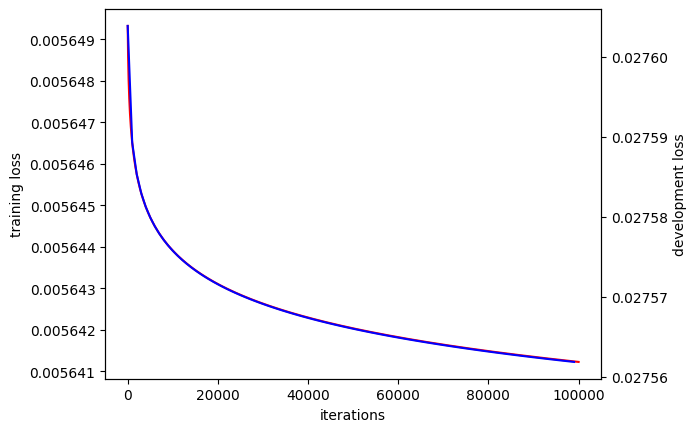

In [35]:
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(train_loss, c='r')
ax2.plot(range(1,100001, 1000), dev_loss, c='b')
ax1.set_xlabel('iterations')
ax1.set_ylabel('training loss')
ax2.set_ylabel('development loss')


#### Evaluating the trained model

In [36]:
loss, pred = Classifier_model_1.evaluate(X_test, Y_test)

In [37]:
accuracy = np.sum(np.where(np.argmax(Y_test, axis=0, keepdims=True) == np.argmax(pred, axis=0, keepdims=True)))/Y_test.shape[1]
accuracy

np.float64(7.8901098901098905)

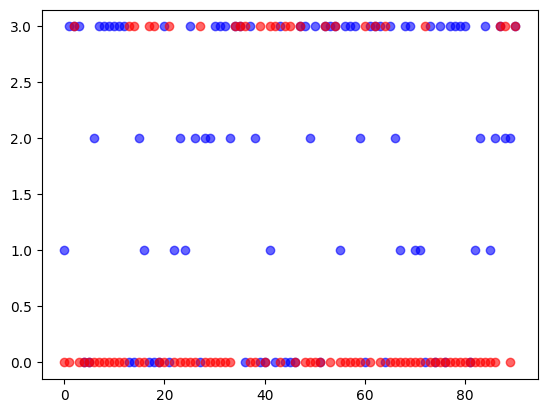

In [38]:
data = np.argmax(Y_test,axis=0, keepdims=True).flatten()
plt.scatter(range(len(data)), data, c="b", alpha=0.6)  # Scatter plot
plt.scatter(range(len(pred)), pred.flatten(), c='r', alpha=0.6)

#### Weights and grads of trained model

In [39]:
for i in Classifier_model_1.grads:
    print(i)
    print(Classifier_model_1.grads[i])

dW4
[[-4.56530442e-06 -8.95866891e-06 -4.26029090e-05  1.19095503e-03
   2.47683448e-04]
 [-1.74469313e-07  5.80218379e-07  2.58327173e-05 -1.54090723e-04
   9.18560948e-05]
 [ 1.01979560e-06  1.95347374e-06  8.53802904e-06 -2.58322642e-04
  -5.66041396e-05]
 [ 3.71997813e-06  6.42497680e-06  8.23216259e-06 -7.78541664e-04
  -2.82935403e-04]]
db4
[[ 4.88699303e-04]
 [ 3.46634683e-05]
 [-6.89412858e-05]
 [-4.54421486e-04]]
dW3
[[-7.63265661e-06  7.15179977e-08  9.47151128e-08 -1.43481267e-06
  -7.58365407e-08]
 [ 1.68412120e-07 -2.31196282e-08  9.92511863e-10 -1.06477534e-07
  -3.77948495e-08]
 [ 1.11121612e-06 -2.53937826e-07  6.17372893e-09 -4.88728211e-06
  -1.99911270e-06]
 [ 6.92152193e-04 -7.44236189e-06 -7.49175340e-06  5.56629841e-05
  -9.24350918e-06]
 [ 1.44117495e-05 -7.72940735e-08  2.98021837e-07 -3.16918397e-05
  -1.17803546e-05]]
db3
[[-4.19767156e-06]
 [ 3.32463754e-07]
 [-9.87898116e-06]
 [ 3.28020725e-04]
 [-5.81567207e-05]]
dW2
[[ 5.72664774e-04  2.63724016e-04  4.156

In [40]:
for i in Classifier_model_1.parameters:
    print(i)
    print(Classifier_model_1.parameters[i])

W1
[[-0.24444228  0.25055354  0.10124394  0.39499006  0.06373171  0.41109208
   0.32270985 -0.51656363 -0.22025036 -0.05582486  0.3039388   0.13590379
  -0.2113125  -0.10650342 -0.13724408 -0.01597304  0.38258749 -0.10063721
  -0.11019851  0.62507007]
 [ 0.53864876 -0.28487264  0.08692132  0.64545742 -0.22779042  0.00985047
   0.17296154  0.23724696  0.15387179  0.31433237 -0.28329323 -0.28483499
   0.00163756 -0.30702802  0.27202092  0.22138375 -0.08570351 -0.29599927
   0.01458986  0.04790832]
 [ 0.55394143 -0.34467963  0.02942379 -0.01108594  0.20792052 -0.04276186
   0.21290608 -0.33847935 -0.14363785 -0.38167546 -0.19849303 -0.26871088
  -0.1569277   0.07964733  0.21161497 -0.35560963 -0.04229911 -0.45343843
  -0.19123954 -0.27921701]
 [ 0.15571274  0.2544454   0.87689526 -0.73714803  0.21785433 -0.56491111
   0.50028736  0.74055546 -0.39226957  0.41297672 -0.24784675 -0.01156611
   0.38590716 -0.44588092 -0.06147313  0.32275725  0.46568619  0.60267232
  -0.25036356 -0.24012341]
 

### Training another model without weighted classes

In [41]:
Classifier_model_2 = NN(input_size=X_train.shape[0], architecture=[5,5,5,4],activations=['Leaky_ReLU', 'Leaky_ReLU', 'Leaky_ReLU', 'Softmax'] ,loss="CCE")

In [42]:
train_loss, dev_loss = model_train(model=Classifier_model_2, learning_rate=0.1, num_epochs=100000)

Epoch 0: Train Loss = 1.703075686500764, Dev Loss = 1.8229336613246927
Epoch 1000: Train Loss = 1.6875594854756348, Dev Loss = 1.805587146779029
Epoch 2000: Train Loss = 1.6834973731773049, Dev Loss = 1.801022509470663
Epoch 3000: Train Loss = 1.6810708858093455, Dev Loss = 1.7982955203013682
Epoch 4000: Train Loss = 1.6793364741982426, Dev Loss = 1.7963562864351283
Epoch 5000: Train Loss = 1.6779881741166744, Dev Loss = 1.794856460380199
Epoch 6000: Train Loss = 1.6768855712623472, Dev Loss = 1.793629955477324
Epoch 7000: Train Loss = 1.6759536621838276, Dev Loss = 1.7925925512092495
Epoch 8000: Train Loss = 1.6751546867257208, Dev Loss = 1.7916986372332537
Epoch 9000: Train Loss = 1.67445337866387, Dev Loss = 1.790912361164515
Epoch 10000: Train Loss = 1.6738263293711395, Dev Loss = 1.790209369384205
Epoch 11000: Train Loss = 1.6732595501487353, Dev Loss = 1.789573890487182
Epoch 12000: Train Loss = 1.672743072133235, Dev Loss = 1.7889944852444708
Epoch 13000: Train Loss = 1.67226823

Text(0, 0.5, 'development loss')

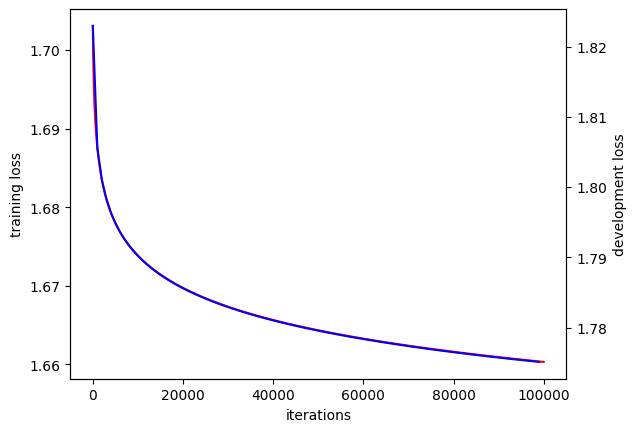

In [43]:
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(train_loss, c='r')
ax2.plot(range(1,100001, 1000), dev_loss, c='b')
ax1.set_xlabel('iterations')
ax1.set_ylabel('training loss')
ax2.set_ylabel('development loss')


#### Evaluating the trained model

In [44]:
loss, pred = Classifier_model_2.evaluate(X_test, Y_test)

In [45]:
accuracy = np.sum(np.where(np.argmax(Y_test, axis=0, keepdims=True) == np.argmax(pred, axis=0, keepdims=True)))/Y_test.shape[1]
accuracy

np.float64(5.857142857142857)

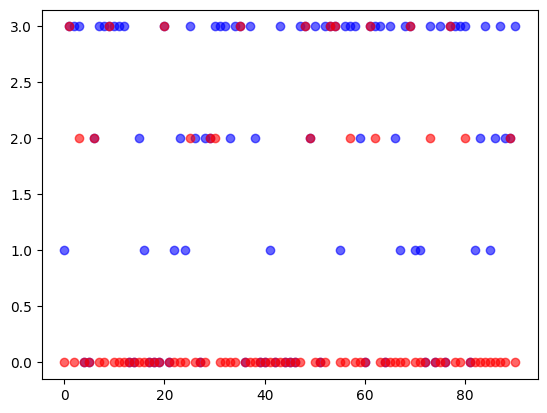

In [46]:
data = np.argmax(Y_test,axis=0, keepdims=True).flatten()
plt.scatter(range(len(data)), data, c="b", alpha=0.6)  # Scatter plot
plt.scatter(range(len(pred)), pred.flatten(), c='r', alpha=0.6)

#### Weights and grads of trained model (without weighted class implementation)

In [47]:
for i in Classifier_model_2.grads:
    print(i)
    print(Classifier_model_2.grads[i])

dW4
[[ 4.14257607e-04  1.29059007e-04  2.82662421e-05  5.76687077e-05
   3.81408089e-05]
 [-6.39596189e-05  3.84410219e-06  6.74824622e-05  1.65418608e-05
   3.17251190e-05]
 [ 2.77306763e-04  3.99210528e-05  1.62543905e-04  3.05566226e-05
   2.34654623e-05]
 [-6.27604751e-04 -1.72824162e-04 -2.58292610e-04 -1.04767191e-04
  -9.33313902e-05]]
db4
[[ 0.00047276]
 [ 0.0001484 ]
 [ 0.00025755]
 [-0.00087871]]
dW3
[[ 8.32499506e-04  4.46011278e-05  2.47276679e-04  8.17400996e-04
   5.91120217e-04]
 [ 2.11244296e-04  1.22937052e-05  7.66243947e-05  2.02251387e-04
   4.06064632e-05]
 [-5.56859884e-05  2.38593176e-06 -2.50501302e-06 -1.92562251e-04
  -1.57302660e-04]
 [-6.01958963e-06  1.22292352e-06 -6.88336934e-06 -1.65644227e-05
   1.84978099e-06]
 [-9.74955486e-05  5.93181290e-06  9.69331917e-07 -2.95374400e-04
  -6.23711910e-06]]
db3
[[ 1.19152649e-03]
 [ 3.55478392e-04]
 [-1.94654545e-04]
 [-1.11106967e-05]
 [-5.03248816e-04]]
dW2
[[ 1.91343669e-04  2.07170749e-04  3.49480431e-04  2.779

In [48]:
for i in Classifier_model_2.parameters:
    print(i)
    print(Classifier_model_2.parameters[i])

W1
[[-0.09940546 -0.22481489  0.30639944  0.19800693 -0.37771191  0.08001008
   0.36272009  0.26765609  0.190942    0.01359235  0.75267842 -0.00625753
  -0.31723337 -0.18765582 -0.10104851 -0.58788294  0.44806222 -0.30419243
   0.1662341   0.18504937]
 [-0.3879612  -0.28700366  0.31749535  0.05049865  0.16444717  0.59253758
  -0.54174271  0.34913144 -0.35994016  0.27117978 -0.21148832  0.42830459
  -0.42465744  0.0095801   0.39013113  0.17953964  0.42038553  0.0898409
  -0.48996022 -0.31850614]
 [ 0.56272713  0.04196404  0.02827675 -0.05554868  0.274154   -0.07790161
   0.1801127  -0.42545862  0.40844475 -0.36290805  0.2694862   0.08015406
   0.41901907  0.19856355  0.09129236 -0.27161794 -0.30208914 -0.22233033
   0.07687413 -0.04957269]
 [ 0.43265447 -0.22250177  0.34691712  0.05282334  0.440676    0.0905263
  -0.16776369  0.48738793 -0.22676648  0.20225109 -0.46221107 -0.72144783
  -0.03896725  0.03287845  0.6761193  -0.02905555  0.10193037 -0.34352475
   0.09143678 -0.0221866 ]
 [-